In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df_train = pd.read_csv("Train.csv")
df_test = pd.read_csv("Test.csv") 
df = pd.read_csv("Sample_submission.csv")
'''
train/test = 42%
'''

'\ntrain/test = 42%\n'

In [3]:
df_train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,1,1,2.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1759,40,200,5.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760,96,218,2.2708,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1761,16,81,5.0625,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train['Class'].value_counts()

0    1620
1     143
Name: Class, dtype: int64

In [5]:
df_test

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558
0,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,108.0,179.0,1.6574,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60.0,120.0,2.0000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
752,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
753,12.0,101.0,8.4166,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
754,31.0,88.0,2.8387,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# split features and label
X = df_train.drop(['Class'], axis=1)
y = df_train['Class']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.33, random_state=42)

In [7]:
X_train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
560,40,40,1.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1234,25,133,5.3200,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
593,43,230,5.3488,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1054,135,200,1.4814,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
341,120,120,1.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,27,57,2.1111,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,58,285,4.9137,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,11,96,8.7272,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1459,1,1,2.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
from sklearn import preprocessing
# normalized_X = preprocessing.normalize(X)
# x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.fit_transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)  # Sclaed data
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)  

In [9]:
X_train_scaled

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,0.061033,0.063830,0.016642,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.037559,0.216039,0.088644,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.065728,0.374795,0.089124,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.209703,0.325696,0.024666,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.186228,0.194763,0.016642,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,0.040689,0.091653,0.035161,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1177,0.089202,0.464812,0.081872,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1178,0.015649,0.155483,0.145432,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1179,0.000000,0.000000,0.033309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<h3>Feature extraction with Autoencoder</h3>

In [14]:

# train autoencoder for classification with no compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
n_inputs = 1559
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(100)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = 100
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(100)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# # define autoencoder model
# model = Model(inputs=visible, outputs=output)
# # compile autoencoder model
# model.compile(optimizer='adam', loss='mse')

# # fit the autoencoder model to reconstruct input
# history = model.fit(X_train_scaled, X_train_scaled, epochs=200, batch_size=16, verbose=2, validation_data=(X_test_scaled, X_test_scaled))
# # plot loss
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
# pyplot.legend()
# pyplot.show()
# # define an encoder model (without the decoder)
# encoder = Model(inputs=visible, outputs=bottleneck)

# # save the encoder to file
# encoder.save('encoder.h5')

2021-09-25 11:56:48.341254: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 299 MB memory:  -> device: 0, name: NVIDIA TITAN RTX, pci bus id: 0000:65:00.0, compute capability: 7.5


2021-09-25 11:56:50.786101: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
74/74 - 2s - loss: 0.0657 - val_loss: 0.0084
Epoch 2/20
74/74 - 1s - loss: 0.0127 - val_loss: 0.0086
Epoch 3/20
74/74 - 1s - loss: 0.0117 - val_loss: 0.0079
Epoch 4/20
74/74 - 1s - loss: 0.0104 - val_loss: 0.0077
Epoch 5/20
74/74 - 1s - loss: 0.0099 - val_loss: 0.0080
Epoch 6/20
74/74 - 1s - loss: 0.0100 - val_loss: 0.0089
Epoch 7/20
74/74 - 1s - loss: 0.0097 - val_loss: 0.0097
Epoch 8/20
74/74 - 1s - loss: 0.0097 - val_loss: 0.0093
Epoch 9/20
74/74 - 1s - loss: 0.0088 - val_loss: 0.0091
Epoch 10/20
74/74 - 1s - loss: 0.0084 - val_loss: 0.0076
Epoch 11/20
74/74 - 1s - loss: 0.0085 - val_loss: 0.0078
Epoch 12/20
74/74 - 1s - loss: 0.0083 - val_loss: 0.0088
Epoch 13/20
74/74 - 1s - loss: 0.0080 - val_loss: 0.0075
Epoch 14/20
74/74 - 1s - loss: 0.0077 - val_loss: 0.0077
Epoch 15/20
74/74 - 1s - loss: 0.0078 - val_loss: 0.0084
Epoch 16/20
74/74 - 1s - loss: 0.0074 - val_loss: 0.0077
Epoch 17/20
74/74 - 1s - loss: 0.0074 - val_loss: 0.0080
Epoch 18/20
74/74 - 1s - loss: 0.0072 - 

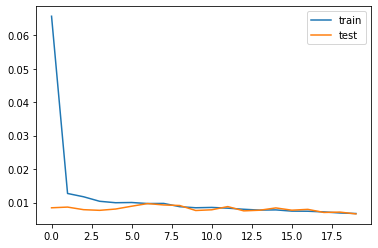

In [15]:
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

# fit the autoencoder model to reconstruct input
history = model.fit(X_train_scaled, X_train_scaled, epochs=20, batch_size=16, verbose=2, validation_data=(X_test_scaled, X_test_scaled))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)

# save the encoder to file
encoder.save('encoder.h5')

In [16]:
from tensorflow.keras.models import load_model
encoder = load_model('encoder.h5')

In [17]:
extract = Model(visible, e)

extracted_train = extract.predict(x=X_train_scaled)

In [18]:
extracted_train = pd.DataFrame(data = extracted_train)
extracted_train

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.517377,0.421567,0.481481,0.448975,-0.119982,0.004384,0.362801,-0.166926,-0.019686,-0.164468,...,0.466466,0.014210,-0.168312,0.498812,-0.148582,0.931392,-0.225645,-0.167131,0.149078,-0.148354
1,0.140920,0.420851,0.127721,-0.106750,-0.191038,0.066599,0.551877,-0.205739,-0.545798,-0.187492,...,0.110451,0.462062,-0.095117,0.470047,-0.082779,0.934943,-0.162377,-0.054198,-0.031914,-0.018355
2,-0.378187,-0.694925,-0.767203,-0.796338,2.290280,2.571729,2.686538,1.803052,3.493833,1.979543,...,-0.213915,1.882010,-0.446865,-0.003509,-0.151209,-0.338492,-0.978471,-0.365265,2.694224,-0.483467
3,-0.754198,0.962268,-0.386775,1.189435,2.252717,1.486790,-0.583899,2.735641,-0.578414,3.321172,...,-0.183565,-0.347974,-0.291436,0.716036,-0.264681,1.642526,1.546804,-0.262262,0.466810,-0.359117
4,0.342448,0.034115,0.884292,0.033908,-0.179719,-0.076219,0.414647,-0.161436,0.055853,-0.158775,...,1.034345,1.168397,-0.075811,0.440363,-0.110780,0.451009,-0.067941,-0.100078,-0.072506,-0.004804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,-0.465650,0.252012,0.648247,-0.309627,-0.129159,0.977972,-0.154676,0.407583,-0.096682,0.144798,...,0.524592,0.004240,-0.092730,2.799240,-0.015125,0.705448,-0.102438,-0.308934,-0.067471,-0.215204
1177,0.253571,0.448364,0.070922,-0.032578,-0.110132,-0.045220,0.365785,-0.179835,0.062977,-0.150243,...,0.573496,0.413638,-0.172073,0.098048,-0.182985,0.285613,-0.145226,-0.167982,0.084229,-0.111560
1178,-0.646555,-0.429573,-0.751888,-0.438927,2.263222,-0.617677,-0.745538,-0.123043,0.116370,-0.245154,...,-0.640820,-0.700907,3.032692,-0.786963,3.221163,-0.269884,0.408835,3.740488,-0.897654,3.411435
1179,-0.080721,0.186454,-0.021239,0.458327,-0.121282,0.615844,-0.196206,0.205502,-0.188402,-0.083898,...,-0.101324,-0.016486,-0.039139,-0.035232,-0.071865,-0.031786,-0.042624,-0.113750,0.942222,-0.099140


In [19]:
extracted_test = extract.predict(x=X_test_scaled)

In [20]:
extracted_test = pd.DataFrame(data = extracted_test)
extracted_test

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.052423,0.073542,0.126920,-0.139139,-0.061465,-0.182982,-0.040468,-0.195288,-0.263608,-0.146965,...,0.492724,0.199340,0.049807,-0.021346,0.063951,-0.064222,0.140048,-0.024519,-0.005929,-0.039614
1,0.302742,0.361895,0.356088,0.177645,-0.120924,0.503829,-0.032104,-0.091118,0.048941,-0.085922,...,0.286718,0.893460,-0.108153,0.225842,-0.190971,0.579553,-0.069939,-0.108896,0.157786,-0.072335
2,0.128472,0.764450,0.692446,0.374407,-0.176036,-0.002505,-0.021665,-0.161464,0.136789,-0.149926,...,0.021985,0.832450,-0.141334,-0.016399,-0.065912,0.190191,-0.133226,-0.115006,-0.002690,-0.088389
3,-0.268649,-0.354776,-0.271679,-0.466483,0.604123,-0.413560,-0.207885,-0.250722,0.558125,-0.229234,...,-0.382716,-0.292143,1.242665,-0.435075,1.207093,-0.346526,0.772877,1.645888,-0.425179,1.350175
4,-0.278413,-0.025194,1.204261,-0.018015,-0.114615,-0.115796,0.634765,-0.214322,1.380892,-0.197915,...,-0.192452,0.780349,-0.183219,-0.135820,0.157683,0.913071,0.619602,-0.178227,0.275776,-0.197353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,-0.534965,-0.511804,-0.506058,-0.600251,1.200102,-0.439485,-0.272585,-0.108879,0.698854,-0.262275,...,-0.630881,-0.379296,2.095432,-0.572279,2.140387,-0.671870,1.504998,2.474644,-0.734732,1.904343
578,-0.510038,-0.611328,-0.486576,-0.532694,1.268567,-0.560977,-0.512623,-0.155611,0.952041,-0.192156,...,-0.712238,-0.376674,3.163150,-0.637886,3.191261,-0.777543,2.683312,2.731036,-0.509937,2.819330
579,0.281300,0.514403,0.599959,0.239053,-0.133207,-0.042687,0.359054,-0.153492,-0.025124,-0.155234,...,0.429005,0.509388,-0.152211,0.359805,-0.144356,0.618604,-0.109689,-0.149965,0.054958,-0.091700
580,-0.199056,0.330793,0.597116,-0.279489,-0.248568,0.297055,-0.024926,-0.097971,0.184919,-0.111726,...,0.643785,0.279797,-0.164149,1.937648,-0.055788,0.777065,-0.146113,-0.256491,-0.036041,-0.144392


In [21]:
extracted_train_scaled = min_max_scaler.fit_transform(extracted_train)
extracted_test_scaled = min_max_scaler.fit_transform(extracted_test)
extracted_test_scaled = pd.DataFrame(extracted_test_scaled)  # Sclaed data
extracted_train_scaled = pd.DataFrame(extracted_train_scaled) 


In [22]:
extracted_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.289075,0.329123,0.328029,0.283026,0.185531,0.155079,0.313528,0.044086,0.191684,0.063230,...,0.215196,0.250940,0.096012,0.338513,0.094146,0.498072,0.160357,0.104773,0.280827,0.126010
1,0.222034,0.328969,0.251981,0.165698,0.168847,0.165537,0.354617,0.039072,0.106094,0.060292,...,0.163557,0.342046,0.109711,0.332602,0.105204,0.498909,0.171956,0.122483,0.244617,0.149729
2,0.129590,0.088909,0.059599,0.020109,0.751460,0.586650,0.818512,0.298551,0.763275,0.336876,...,0.116509,0.630902,0.043879,0.235282,0.093704,0.198621,0.022339,0.073701,0.790016,0.064866
3,0.062628,0.445455,0.141380,0.439355,0.742640,0.404272,0.107795,0.419015,0.100788,0.508112,...,0.120911,0.177262,0.072969,0.383155,0.074635,0.665764,0.485307,0.089854,0.344393,0.087554
4,0.257923,0.245763,0.414621,0.195395,0.171505,0.141529,0.324795,0.044795,0.203973,0.063957,...,0.297566,0.485734,0.113324,0.326502,0.100498,0.384793,0.189270,0.115288,0.236496,0.152202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,0.114014,0.292643,0.363879,0.122866,0.183376,0.318739,0.201072,0.118296,0.179158,0.102703,...,0.223627,0.248912,0.110158,0.811273,0.116573,0.444792,0.182945,0.082535,0.237503,0.113813
1177,0.242096,0.334889,0.239771,0.181358,0.187844,0.146740,0.314176,0.042418,0.205132,0.065046,...,0.230721,0.332195,0.095308,0.256153,0.088364,0.345791,0.175101,0.104639,0.267853,0.132723
1178,0.081798,0.146000,0.062891,0.095567,0.745107,0.050510,0.072668,0.049754,0.213818,0.052932,...,0.054587,0.105466,0.695101,0.074274,0.660428,0.214800,0.276679,0.717566,0.071414,0.775521
1179,0.182564,0.278538,0.219959,0.285000,0.185226,0.257865,0.192047,0.092193,0.164237,0.073514,...,0.132840,0.244696,0.120188,0.228762,0.107038,0.270945,0.193911,0.113144,0.439505,0.134989


<h3>Build VAE network for training</h3>

In [23]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from keras.metrics import binary_crossentropy
from tensorflow.keras.callbacks import LearningRateScheduler

import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
import tensorflow as tf


m = 64
n_z = 2
n_epoch = 10


# Q(z|X) -- encoder
inputs = Input(shape=(100,))
h_q = Dense(512, activation='relu')(inputs)
h_q = Dense(1024, activation='relu')(inputs)
decoder_hidden = Dense(2048, activation='relu')
mu = Dense(n_z, activation='linear')(h_q)
log_sigma = Dense(n_z, activation='linear')(h_q)


def sample_z(args):
#     z_mean, z_log_sigma = args
#     batch_size = tf.shape(z_mean)[0]
#     epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
#     return z_mean + K.exp(0.5 * z_log_sigma) * epsilon

    mu, log_sigma = args
    batch_size = tf.shape(mu)[0]
    eps = K.random_normal(shape=(batch_size, n_z), mean=0., stddev=1.)
    return mu + K.exp(log_sigma / 2) * eps


# Sample z ~ Q(z|X)
z = Lambda(sample_z)([mu, log_sigma])

# P(X|z) -- decoder
decoder_hidden = Dense(2048, activation='relu')
decoder_hidden = Dense(1024, activation='relu')
decoder_hidden = Dense(512, activation='relu')
decoder_out = Dense(100, activation='sigmoid')

h_p = decoder_hidden(z)
outputs = decoder_out(h_p)

# Overall VAE model, for reconstruction and training
vae = Model(inputs, outputs)

# Encoder model, to encode input into latent variable
# We use the mean as the output as it is the center point, the representative of the gaussian
encoder = Model(inputs, mu)

# Generator model, generate new data given latent variable z
d_in = Input(shape=(n_z,))
d_h = decoder_hidden(d_in)
d_out = decoder_out(d_h)
decoder = Model(d_in, d_out)

def vae_loss(recon_x, x):
    """ Calculate loss = reconstruction loss + KL loss for each data in minibatch """
    # E[log P(X|z)]
    recon = K.sum(K.binary_crossentropy(recon_x, x), axis=1)
    # D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
    kl = 0.5 * K.sum(K.exp(log_sigma) + K.square(mu) - 1. - log_sigma, axis=1)

    return recon + kl

In [24]:
loss = vae_loss(inputs, outputs)

In [25]:
vae.compile(optimizer='adam', loss=vae_loss)
vae.fit(extracted_train_scaled, extracted_train_scaled, batch_size=m, epochs=100, validation_data=(extracted_test_scaled, extracted_test_scaled))

Train on 1181 samples, validate on 582 samples
Epoch 1/100
  64/1181 [>.............................] - ETA: 2s - loss: 69.3799

2021-09-25 11:57:05.606393: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 299 MB memory:  -> device: 0, name: NVIDIA TITAN RTX, pci bus id: 0000:65:00.0, compute capability: 7.5


1181/1181 [==============================] - 0s 232us/sample - loss: 63.2502 - val_loss: 56.6628
Epoch 2/100
1181/1181 [==============================] - 0s 80us/sample - loss: 53.7711 - val_loss: 51.9130
Epoch 3/100
  64/1181 [>.............................] - ETA: 0s - loss: 51.3137

/home/zh314/jupyter_notebook/jupyterenv/lib/python3.7/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1181/1181 [==============================] - 0s 89us/sample - loss: 51.0804 - val_loss: 50.3898
Epoch 4/100
1181/1181 [==============================] - 0s 89us/sample - loss: 50.0105 - val_loss: 49.9578
Epoch 5/100
1181/1181 [==============================] - 0s 88us/sample - loss: 49.6961 - val_loss: 49.7721
Epoch 6/100
1181/1181 [==============================] - 0s 90us/sample - loss: 49.4275 - val_loss: 49.5131
Epoch 7/100
1181/1181 [==============================] - 0s 90us/sample - loss: 49.1080 - val_loss: 49.0498
Epoch 8/100
1181/1181 [==============================] - 0s 90us/sample - loss: 48.7272 - val_loss: 48.7278
Epoch 9/100
1181/1181 [==============================] - 0s 76us/sample - loss: 48.5587 - val_loss: 48.5536
Epoch 10/100
1181/1181 [==============================] - 0s 71us/sample - loss: 48.3969 - val_loss: 48.4919
Epoch 11/100
1181/1181 [==============================] - 0s 66us/sample - loss: 48.2778 - val_loss: 48.4057
Epoch 12/100
1181/1181 [==============

1181/1181 [==============================] - 0s 91us/sample - loss: 47.1750 - val_loss: 47.1345
Epoch 79/100
1181/1181 [==============================] - 0s 89us/sample - loss: 47.1980 - val_loss: 47.0742
Epoch 80/100
1181/1181 [==============================] - 0s 89us/sample - loss: 47.2170 - val_loss: 47.0056
Epoch 81/100
1181/1181 [==============================] - 0s 90us/sample - loss: 47.2183 - val_loss: 47.0133
Epoch 82/100
1181/1181 [==============================] - 0s 89us/sample - loss: 47.2445 - val_loss: 47.1834
Epoch 83/100
1181/1181 [==============================] - 0s 89us/sample - loss: 47.2275 - val_loss: 47.1715
Epoch 84/100
1181/1181 [==============================] - 0s 88us/sample - loss: 47.1746 - val_loss: 47.1382
Epoch 85/100
1181/1181 [==============================] - 0s 90us/sample - loss: 47.2354 - val_loss: 47.0424
Epoch 86/100
1181/1181 [==============================] - 0s 90us/sample - loss: 47.1790 - val_loss: 47.0865
Epoch 87/100
1181/1181 [========

In [26]:
def mse_error(x_explain):
        """
        Sort all records in x_explain by their MSE calculated according to their prediction by the trained VAE
        and return the top num_anomalies_to_explain (its value given by the user at class initialization) records.
        Args:
            x_explain (data frame): Set of records we want to explain the most anomalous ones from it.
        Returns:
            list: List of index of the top num_anomalies_to_explain records with highest MSE that will be explained.
        """
        
        predictions = vae.predict(x_explain)
        square_errors = np.power(x_explain - predictions, 2)
        mse_series = pd.Series(np.mean(square_errors, axis=1))

        most_anomal_trx = mse_series.sort_values(ascending=False)
        columns = ["id", "mse_all_columns"]
        columns.extend(["squared_error_" + x for x in list(str(x_explain.columns))])
        items = []
        for x in most_anomal_trx.iteritems():
            item = [x[0], x[1]]
            item.extend(square_errors.loc[x[0]])
            items.append(item)
        
   
#         df_anomalies = pd.DataFrame(items, columns=columns)
#         df_anomalies.set_index("id", inplace=True)

#         top_anomalies_to_explain = df_anomalies.head(629).index
#         return top_anomalies_to_explain
        return items

In [27]:
error = mse_error(extracted_test_scaled)

In [28]:
error

[[155,
  0.07169480621814728,
  0.009252296760678291,
  0.0007287358166649938,
  0.019150136038661003,
  0.12389057129621506,
  0.0626288577914238,
  0.0002699027245398611,
  0.08884155750274658,
  1.923680247273296e-05,
  0.06869477778673172,
  0.00014161656145006418,
  0.04592743143439293,
  0.0021240939386188984,
  0.051689282059669495,
  0.06607643514871597,
  0.03236973285675049,
  0.0003061788738705218,
  0.4192717373371124,
  0.012061619199812412,
  0.0557355135679245,
  5.528974361368455e-05,
  0.009550544433295727,
  0.01119154505431652,
  0.5985168814659119,
  0.4413380026817322,
  0.008949225768446922,
  0.026421869173645973,
  0.04100067913532257,
  0.06173967942595482,
  0.013191540725529194,
  0.00021766021382063627,
  0.03883567079901695,
  0.04735918343067169,
  0.05573273450136185,
  0.008421487174928188,
  1.809789682738483e-05,
  0.06585807353258133,
  1.6969117496046238e-05,
  0.0865195021033287,
  0.005511673633009195,
  0.011530524119734764,
  0.044624682515859604

In [29]:
error_arr= np.array(error)

In [30]:
error_arr

array([[1.55000000e+02, 7.16948062e-02, 9.25229676e-03, ...,
        1.34208705e-02, 9.07806121e-03, 3.83750685e-02],
       [1.32000000e+02, 7.11938068e-02, 5.45523643e-01, ...,
        2.38512162e-04, 3.13128531e-01, 3.19996849e-03],
       [4.16000000e+02, 7.05287531e-02, 1.91214651e-01, ...,
        1.01346727e-02, 2.78139204e-01, 3.73485428e-03],
       ...,
       [1.44000000e+02, 6.92645961e-04, 8.19579815e-04, ...,
        7.05854254e-05, 3.99271201e-04, 4.12931414e-08],
       [3.51000000e+02, 6.77591132e-04, 7.87891622e-04, ...,
        8.32640217e-05, 5.41532238e-04, 2.82946075e-07],
       [2.50000000e+02, 6.76965283e-04, 4.14525904e-03, ...,
        4.64914774e-05, 1.04303751e-03, 3.39151541e-07]])

In [31]:
error_df = pd.DataFrame(error_arr)

In [32]:
test_error = error_df.iloc[:,0]
test_error

0      155.0
1      132.0
2      416.0
3       16.0
4       22.0
       ...  
577    579.0
578    116.0
579    144.0
580    351.0
581    250.0
Name: 0, Length: 582, dtype: float64

In [33]:
test_error = test_error.astype(int)

test_error_head = test_error.head(143)

test_error_head = test_error_head.to_numpy()

In [34]:
test_error_head

array([155, 132, 416,  16,  22, 115, 412,  57, 157,  64,  75, 151, 528,
       510, 581, 302, 548, 383, 367, 435, 425, 478, 315, 426,   5, 365,
       171, 297, 122,  24, 495, 107, 277,  71, 293, 188, 540, 372,  86,
       276,  72, 500, 444, 576, 316, 428, 303, 304, 485, 549, 287, 497,
       530,  82, 464, 328,  97,  17, 386, 202,  33, 185, 118, 175, 261,
       423, 437, 205, 306,  77, 189,  53, 403, 559, 402, 556,  90, 217,
       181, 170, 491, 560, 186, 371, 498, 341, 150,  96, 443, 246, 469,
       317, 251,  25, 397, 124, 203, 358, 103,  37, 172, 571,  74, 477,
        89,  69,  35, 196, 526, 474, 369, 541, 395, 349, 245, 100, 536,
       531, 451, 504, 501, 133,  54, 247, 389,   8, 557,  27,  14, 193,
       154, 484, 321, 167, 273,  92, 429, 346, 236, 278, 134, 532, 240])

In [35]:
anomaly = extracted_test_scaled.iloc[test_error_head]

In [36]:
anomaly

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
155,0.102659,0.210962,0.122038,0.492161,0.022887,0.092752,0.513523,0.037451,0.021387,0.044764,...,1.000000,0.112105,0.111415,0.095207,0.106845,0.012966,0.747887,0.121146,0.105671,0.090651
132,1.000000,0.637035,0.159244,0.448242,0.304455,0.121612,0.132817,0.023490,0.462202,0.071905,...,0.118213,0.106704,0.578708,0.130764,0.165997,0.163778,0.053866,0.092945,0.853768,0.081654
416,0.708178,0.070813,0.140261,0.014138,0.093151,0.558803,0.834541,0.192489,0.214510,0.336251,...,0.043999,0.058600,0.103822,0.496819,0.625074,0.100639,0.293006,0.000000,0.945483,0.152771
16,0.096845,0.218847,0.124802,0.446080,0.015113,0.077076,0.499005,0.041930,0.004005,0.047590,...,0.971320,0.116050,0.101503,0.099451,0.109294,0.013606,0.733014,0.107546,0.104377,0.070450
22,0.108194,0.204422,0.107799,0.496816,0.029506,0.096989,0.485518,0.047446,0.000000,0.057015,...,0.989779,0.103538,0.113737,0.090324,0.099731,0.000000,0.789762,0.116757,0.098763,0.080113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0.086350,0.176722,0.061935,0.105972,0.794998,0.055739,0.072927,0.030500,0.275472,0.057822,...,0.028002,0.129208,0.746429,0.049162,0.744425,0.220797,0.268919,0.838517,0.072984,0.792425
278,0.189786,0.368295,0.202096,0.168328,0.197796,0.244551,0.204655,0.084022,0.134025,0.091636,...,0.117237,0.399330,0.251453,0.193997,0.113952,0.218811,0.175511,0.125053,0.250987,0.139697
134,0.098418,0.252690,0.211379,0.103586,0.206941,0.368343,0.186521,0.110345,0.207982,0.101564,...,0.228263,0.315130,0.127929,0.852405,0.120958,0.515489,0.180212,0.088590,0.238382,0.118542
532,0.160249,0.524902,0.214600,0.249417,0.118973,0.205370,0.453974,0.064183,0.162595,0.082761,...,0.079419,0.232103,0.093677,0.171415,0.096299,0.251989,0.173681,0.108414,0.247650,0.164231


In [37]:
de_test = extracted_test_scaled.copy()
de_test['attack'] = 0
de_test.loc[test_error_head,'attack']= 1

In [38]:
de_test['attack'].value_counts()

0    439
1    143
Name: attack, dtype: int64

In [39]:
y_de = de_test['attack']
y_de

0      0
1      0
2      0
3      0
4      0
      ..
577    0
578    0
579    0
580    0
581    1
Name: attack, Length: 582, dtype: int64

In [40]:
from sklearn.metrics import f1_score
f1_score(y_test, y_de, average='weighted')

0.7896573379669604

<h3>use SHAP to interpret</h3>

In [36]:
 def f(extracted_test_scaled):
        return vae.predict(extracted_test_scaled)

In [37]:
import shap
shap.initjs()
explainer = shap.KernelExplainer(f, shap.sample(extracted_test_scaled, 10)) # choose 500 'typical' data from train
shap_values = explainer.shap_values(anomaly, nsamples='auto')


  0%|          | 0/143 [00:00<?, ?it/s]

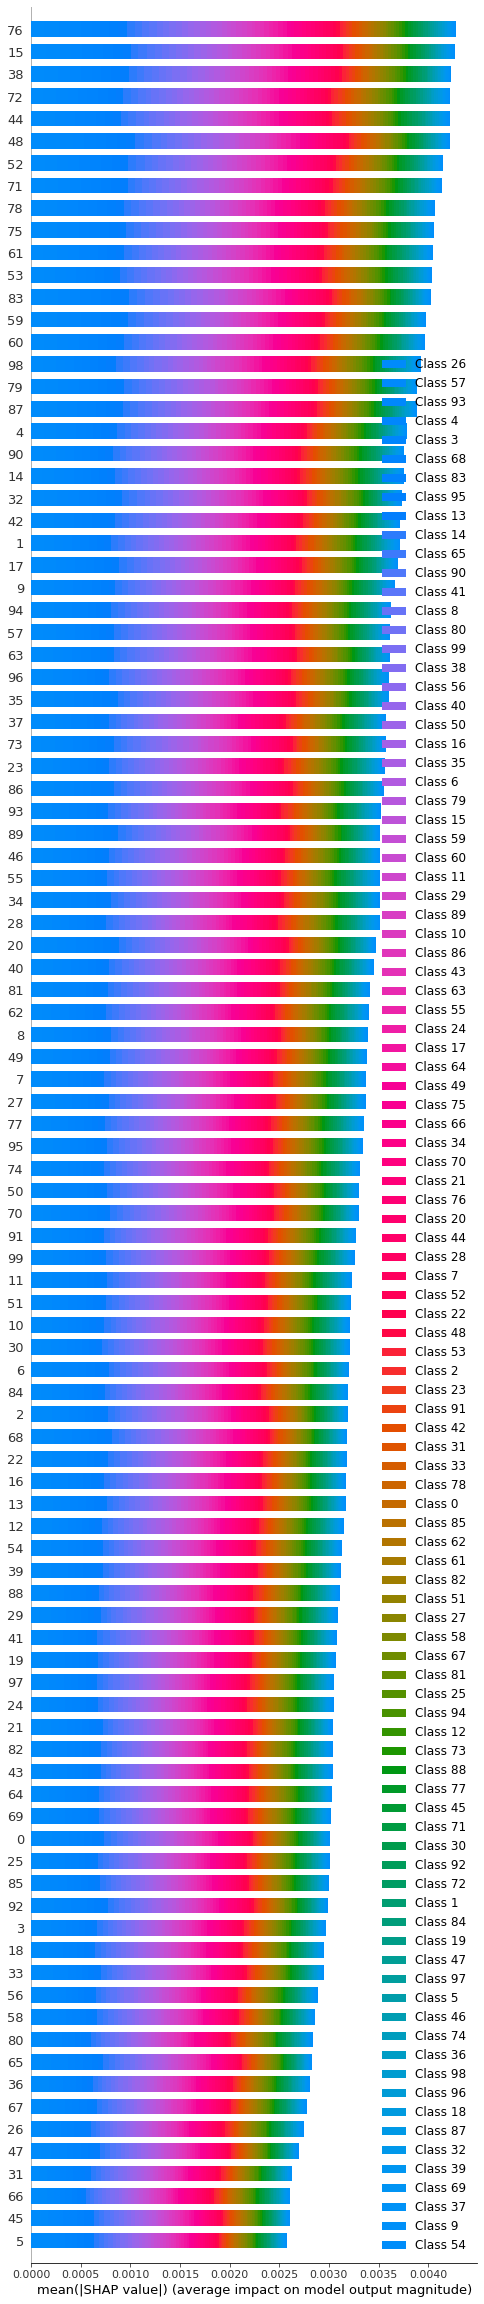

In [38]:
shap.summary_plot(shap_values, features = anomaly, plot_type='bar', max_display=anomaly.shape[1])

In [39]:
anomaly.columns[np.argsort(np.abs(shap_values).mean(0))]
import numpy as np
vals= np.abs(shap_values).mean(0)

feature_importance = pd.DataFrame(list(zip(anomaly.columns, sum(vals))), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
feature_importance

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


,col_name,feature_importance_vals
76,76,0.006122
15,15,0.006106
38,38,0.006044
72,72,0.006036
44,44,0.006032
...,...,...
47,47,0.003853
31,31,0.003761
66,66,0.003734
45,45,0.003731


<h3>Extract high importance features</h3>

In [40]:
extracted_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.283287,0.451176,0.218485,0.213046,0.400319,0.235001,0.296112,0.300053,0.197311,0.338646,...,0.205776,0.123888,0.147348,0.239011,0.512866,0.226248,0.317155,0.259947,0.379701,0.318350
1,0.221462,0.318331,0.188019,0.145136,0.909655,0.272850,0.308047,0.273128,0.299880,0.476233,...,0.236951,0.431608,0.080186,0.310714,0.939571,0.220997,0.750169,0.217581,0.469106,0.249738
2,0.154589,0.719041,0.189095,0.244297,0.181735,0.314539,0.208079,0.281563,0.000000,0.327969,...,0.156836,0.281078,0.136328,0.274223,0.406799,0.214893,0.796495,0.299378,0.444614,0.203111
3,0.401187,0.219970,0.278728,0.127873,0.250390,0.196816,0.241549,0.269566,0.532499,0.393988,...,0.591490,0.149833,0.113135,0.549765,0.851685,0.281443,0.248780,0.239755,0.245518,0.257796
4,0.437060,0.289934,0.231931,0.222376,0.576593,0.207071,0.268696,0.288996,0.391301,0.399456,...,0.207669,0.236932,0.075724,0.275853,0.476610,0.202678,0.323716,0.434055,0.325602,0.581118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,0.237460,0.483732,0.342058,0.214106,0.300097,0.230288,0.608661,0.242046,0.231276,0.416538,...,0.186592,0.191593,0.084061,0.303242,0.524701,0.281441,0.199067,0.226343,0.314113,0.519872
1177,0.377429,0.219859,0.232973,0.427253,0.206252,0.236534,0.281416,0.294544,0.345046,0.364210,...,0.184849,0.319788,0.150700,0.269784,0.363756,0.203613,0.237000,0.221228,0.328102,0.338025
1178,0.291410,0.282381,0.169407,0.141536,0.348753,0.418370,0.464327,0.485951,0.367649,0.245314,...,0.571592,0.484714,0.131002,0.891725,0.180105,0.548222,0.253368,0.382392,0.399778,0.504830
1179,0.178110,0.449582,0.250717,0.539590,0.224672,0.219690,0.234105,0.715225,0.156911,0.308800,...,0.335322,0.101360,0.274880,0.308925,0.132133,0.268441,0.389850,0.201183,0.173446,0.211528


In [ ]:
for i in range(2,100):
    it = feature_importance.iloc[:i,0]
    it = it.to_list()
    explained_train = extracted_train_scaled[it]
    explained_test = extracted_test_scaled[it]
    model(it)

In [74]:
it = feature_importance.iloc[:60,0]

In [75]:
it = it.to_list()
it

[76,
 15,
 38,
 72,
 44,
 48,
 52,
 71,
 78,
 75,
 61,
 53,
 83,
 59,
 60,
 98,
 79,
 87,
 4,
 90,
 14,
 32,
 42,
 1,
 17,
 9,
 94,
 57,
 63,
 96,
 35,
 37,
 73,
 23,
 86,
 93,
 89,
 46,
 55,
 34,
 28,
 20,
 40,
 81,
 62,
 8,
 49,
 7,
 27,
 77,
 95,
 74,
 50,
 70,
 91,
 99,
 11,
 51,
 10,
 30]

In [77]:
explained_train = extracted_train_scaled[it]

explained_test = extracted_test_scaled[it]

In [89]:
m = 64
n_z = 2
n_epoch = 10

def model(it):
    # Q(z|X) -- encoder
    inputs = Input(shape=(len(it),))
    h_q = Dense(512, activation='relu')(inputs)
    h_q = Dense(1024, activation='relu')(inputs)
    decoder_hidden = Dense(2048, activation='relu')
    mu = Dense(n_z, activation='linear')(h_q)
    log_sigma = Dense(n_z, activation='linear')(h_q)


    def sample_z(args):
    #     z_mean, z_log_sigma = args
    #     batch_size = tf.shape(z_mean)[0]
    #     epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
    #     return z_mean + K.exp(0.5 * z_log_sigma) * epsilon

        mu, log_sigma = args
        batch_size = tf.shape(mu)[0]
        eps = K.random_normal(shape=(batch_size, n_z), mean=0., stddev=1.)
        return mu + K.exp(log_sigma / 2) * eps


    # Sample z ~ Q(z|X)
    z = Lambda(sample_z)([mu, log_sigma])

    # P(X|z) -- decoder
    decoder_hidden = Dense(2048, activation='relu')
    decoder_hidden = Dense(1024, activation='relu')
    decoder_hidden = Dense(512, activation='relu')
    decoder_out = Dense(len(it), activation='sigmoid')

    h_p = decoder_hidden(z)
    outputs = decoder_out(h_p)

    # Overall VAE model, for reconstruction and training
    vae = Model(inputs, outputs)

    # Encoder model, to encode input into latent variable
    # We use the mean as the output as it is the center point, the representative of the gaussian
    encoder = Model(inputs, mu)

    # Generator model, generate new data given latent variable z
    d_in = Input(shape=(n_z,))
    d_h = decoder_hidden(d_in)
    d_out = decoder_out(d_h)
    decoder = Model(d_in, d_out)

    def vae_loss(recon_x, x):
        """ Calculate loss = reconstruction loss + KL loss for each data in minibatch """
        # E[log P(X|z)]
        recon = K.sum(K.binary_crossentropy(recon_x, x), axis=1)
        # D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
        kl = 0.5 * K.sum(K.exp(log_sigma) + K.square(mu) - 1. - log_sigma, axis=1)

        return recon + kl

    vae.compile(optimizer='adam', loss=vae_loss)
    vae.fit(explained_train, explained_train, batch_size=m, epochs=100, validation_data=(explained_test, explained_test))
    explained_test = []

In [79]:
# import tensorflow as tf
# tf.compat.v1.disable_eager_execution()
# from tensorflow.keras.layers import Input, Dense, Lambda
# from tensorflow.keras.models import Model
# from keras.metrics import binary_crossentropy
# from tensorflow.keras.callbacks import LearningRateScheduler

# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow.keras.backend as K
# import tensorflow as tf


# m = 64
# n_z = 2
# n_epoch = 10


# # Q(z|X) -- encoder
# inputs = Input(shape=(len(it),))
# h_q = Dense(512, activation='relu')(inputs)
# h_q = Dense(1024, activation='relu')(inputs)
# decoder_hidden = Dense(2048, activation='relu')
# mu = Dense(n_z, activation='linear')(h_q)
# log_sigma = Dense(n_z, activation='linear')(h_q)


# def sample_z(args):
# #     z_mean, z_log_sigma = args
# #     batch_size = tf.shape(z_mean)[0]
# #     epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
# #     return z_mean + K.exp(0.5 * z_log_sigma) * epsilon

#     mu, log_sigma = args
#     batch_size = tf.shape(mu)[0]
#     eps = K.random_normal(shape=(batch_size, n_z), mean=0., stddev=1.)
#     return mu + K.exp(log_sigma / 2) * eps


# # Sample z ~ Q(z|X)
# z = Lambda(sample_z)([mu, log_sigma])

# # P(X|z) -- decoder
# decoder_hidden = Dense(2048, activation='relu')
# decoder_hidden = Dense(1024, activation='relu')
# decoder_hidden = Dense(512, activation='relu')
# decoder_out = Dense(len(it), activation='sigmoid')

# h_p = decoder_hidden(z)
# outputs = decoder_out(h_p)

# # Overall VAE model, for reconstruction and training
# vae = Model(inputs, outputs)

# # Encoder model, to encode input into latent variable
# # We use the mean as the output as it is the center point, the representative of the gaussian
# encoder = Model(inputs, mu)

# # Generator model, generate new data given latent variable z
# d_in = Input(shape=(n_z,))
# d_h = decoder_hidden(d_in)
# d_out = decoder_out(d_h)
# decoder = Model(d_in, d_out)

# def vae_loss(recon_x, x):
#     """ Calculate loss = reconstruction loss + KL loss for each data in minibatch """
#     # E[log P(X|z)]
#     recon = K.sum(K.binary_crossentropy(recon_x, x), axis=1)
#     # D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
#     kl = 0.5 * K.sum(K.exp(log_sigma) + K.square(mu) - 1. - log_sigma, axis=1)

#     return recon + kl

# vae.compile(optimizer='adam', loss=vae_loss)
# vae.fit(explained_train, explained_train, batch_size=m, epochs=100, validation_data=(explained_test, explained_test))

Train on 1181 samples, validate on 582 samples
Epoch 1/100
1181/1181 [==============================] - 1s 551us/sample - loss: 39.7322 - val_loss: 38.1574
Epoch 2/100
  64/1181 [>.............................] - ETA: 0s - loss: 38.0857

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 0s 230us/sample - loss: 37.3804 - val_loss: 37.2904
Epoch 3/100
1181/1181 [==============================] - 0s 223us/sample - loss: 36.9127 - val_loss: 37.1415
Epoch 4/100
1181/1181 [==============================] - 0s 223us/sample - loss: 36.7471 - val_loss: 37.1010
Epoch 5/100
1181/1181 [==============================] - 0s 220us/sample - loss: 36.6529 - val_loss: 36.9777
Epoch 6/100
1181/1181 [==============================] - 0s 228us/sample - loss: 36.5964 - val_loss: 36.9265
Epoch 7/100
1181/1181 [==============================] - 0s 230us/sample - loss: 36.5512 - val_loss: 36.9198
Epoch 8/100
1181/1181 [==============================] - ETA: 0s - loss: 36.52 - 0s 226us/sample - loss: 36.5361 - val_loss: 36.9050
Epoch 9/100
1181/1181 [==============================] - 0s 229us/sample - loss: 36.5226 - val_loss: 36.8845
Epoch 10/100
1181/1181 [==============================] - 0s 227us/sample - loss: 36.5105 - val_loss: 36.8827
Epoch 

In [82]:
explained_error = mse_error(explained_test)

explained_error_arr= np.array(explained_error)
explained_error_df = pd.DataFrame(explained_error_arr)

test_explained_error = explained_error_df.iloc[:,0]
test_explained_error

0      403.0
1       16.0
2      549.0
3      175.0
4       22.0
       ...  
577    286.0
578    190.0
579    272.0
580    450.0
581    545.0
Name: 0, Length: 582, dtype: float64

In [83]:
test_explained_error = test_explained_error.astype(int)

test_explained_error_head = test_explained_error.head(143)

test_explained_error_head = test_explained_error_head.to_numpy()

In [84]:
explained_anomaly = explained_test.iloc[test_explained_error_head]

In [85]:
de_test_explained = extracted_test_scaled.copy()
de_test_explained['attack'] = 0
de_test_explained.loc[test_explained_error_head,'attack']= 1

In [86]:
y_de_explained = de_test_explained['attack']
y_de_explained

0      0
1      0
2      0
3      0
4      0
      ..
577    1
578    1
579    0
580    0
581    1
Name: attack, Length: 582, dtype: int64

In [87]:
from sklearn.metrics import f1_score
f1_score(y_test, y_de_explained, average='weighted')

0.8034052243743487